In [ ]:
!pip install pandas

In [89]:
!pip3 install xgboost

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [92]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.3MB 5.0MB/s eta 0:00:01
  Found existing installation: pip 18.0
    Uninstalling pip-18.0:
      Successfully uninstalled pip-18.0


In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install msgpack

In [ ]:
!pip install xgboost

In [ ]:
!pip install hyperopt

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import math
from sklearn.metrics import mean_squared_error
import time

In [2]:
%matplotlib inline

In [3]:
!dir

Beer_hackathon.ipynb  Beer\ Test\ Data\ Set.csv  Beer\ Train\ Data\ Set.csv


In [3]:
train_Data = pd.read_csv("Beer Train Data Set.csv")

In [4]:
print(train_Data.columns.values)

['ABV' 'Brewing Company' 'Food Paring' 'Glassware Used' 'Beer Name'
 'Ratings' 'Style Name' 'Cellar Temperature' 'Serving Temperature' 'Score']


In [5]:
space = {
        'n_estimators': hp.uniform('n_estimators', 100, 1000),
        'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(1, 60, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        # Increase this number if you have more cores. Otherwise, remove it and it will default
        # to the maxium number.
        'nthread': 4,
        "xg_reg_alpha": hp.loguniform('xg_reg_alpha',1e-9,1.0),
        "xg_reg_lambda":hp.loguniform('xg_reg_lambda',1e-9,1)

    }

In [ ]:
#writing a function which returns unique values for a particular column
def get_unique_value_counts(dataframe,feature_name):
    unique_values = len(dataframe[feature_name].unique())
    return unique_value_count
    


In [6]:
#unique_v_counts_features = ["Style Name","Brewing Company",""]
print(len(train_Data["Style Name"].unique()))

94


Find a way to encode beer style name.

In [7]:
train_Data["Style Name"].value_counts()

AmericanIPA                      25577
AmericanPaleAle(APA)             12648
AmericanPorter                   11992
AmericanDoubleImperialIPA        10147
SaisonFarmhouseAle                8982
AmericanAmberRedAle               5924
AmericanWildAle                   5523
AmericanDoubleImperialStout       5125
AmericanStout                     4911
AmericanBlondeAle                 4234
FruitVegetableBeer                4088
AmericanBrownAle                  3958
Hefeweizen                        3670
Witbier                           3265
GermanPilsener                    2955
BelgianPaleAle                    2909
EuroPaleLager                     2444
BerlinerWeissbier                 2376
AmericanBlackAle                  2255
MrzenOktoberfest                  2214
EnglishPaleAle                    2176
EnglishBitter                     2164
AmericanPaleLager                 2160
Tripel                            1987
Klsch                             1888
CzechPilsener            

In [8]:
train_Data.isna().sum()

ABV                    15130
Brewing Company            0
Food Paring                0
Glassware Used             0
Beer Name                  0
Ratings                    0
Style Name                 0
Cellar Temperature      6781
Serving Temperature      193
Score                      0
dtype: int64

In [9]:
food_pairing_unique_list = (train_Data["Food Paring"].unique())

In [10]:
print(train_Data["Brewing Company"].max())

13541


In [11]:
train_Data = shuffle(train_Data, random_state=2)

In [12]:
train_Data.reset_index(drop=True,inplace=True)

In [13]:
#train_Data.drop(labels=["Cellar Temperature"],inplace=True,axis=1)

In [14]:
#handle ABV
mean_abv = train_Data["ABV"].mean()

print(mean_abv)

train_Data["ABV"].fillna(mean_abv, inplace=True)

6.354960736131313


In [15]:
(train_Data["Cellar Temperature"].value_counts().index)[0]

'40-45'

In [16]:
train_Data["Cellar Temperature"].fillna((train_Data["Cellar Temperature"].value_counts().index)[0],inplace=True)

In [49]:
(train_Data["Serving Temperature"].value_counts().index)[0]

'45-50'

In [50]:
train_Data["Serving Temperature"].fillna((train_Data["Cellar Temperature"].value_counts().index)[0],inplace=True)

In [17]:
#converting into float from string
train_Data["Ratings"] = train_Data['Ratings'].str.replace(',', '')
train_Data["Ratings"] = train_Data['Ratings'].astype(np.float64)

In [18]:
cellar_temp_dataframe = pd.get_dummies(train_Data["Cellar Temperature"])

In [51]:
serving_temp_dataframe = pd.get_dummies(train_Data["Serving Temperature"])

In [59]:
serving_temp_dataframe.rename(columns={"35-40": "s_t1", "40-45": "s_t2","45-50":"s_t3","50-55":"s_t4"},inplace=True)

In [60]:
serving_temp_dataframe.reset_index(drop=True,inplace=True)

In [61]:
cellar_temp_dataframe.reset_index(drop=True,inplace=True)

In [62]:
print(cellar_temp_dataframe.head(n=5))

   35-40  40-45  45-50
0      1      0      0
1      1      0      0
2      0      0      1
3      0      0      1
4      0      1      0


In [21]:
#as of now not taking serving temperature as a input
#train_Data_Wo_Serving_Null = train_Data[train_Data["Serving Temperature"].notnull()]

In [63]:
train_Data.isna().sum()

ABV                    0
Brewing Company        0
Food Paring            0
Glassware Used         0
Beer Name              0
Ratings                0
Style Name             0
Cellar Temperature     0
Serving Temperature    0
Score                  0
dtype: int64

In [64]:
#generic function for doing target based en

def get_target_based_encoding(dataframe,feature_to_encode,target_feature):
    
    unique_feature_values = dataframe[feature_to_encode].unique()
    
    dict_category_value = {}
    
    for each_category in unique_feature_values:
        target_based_category_value = dataframe[ dataframe[feature_to_encode] == each_category] [target_feature]
        dict_category_value[each_category] = target_based_category_value.sum() / len(target_based_category_value)
    
    dataframe[feature_to_encode].replace(to_replace=dict_category_value,inplace=True)
        
        
    


In [65]:
get_target_based_encoding(train_Data,"Style Name","Score")

In [66]:
get_target_based_encoding(train_Data,"Food Paring","Score")

In [67]:
get_target_based_encoding(train_Data,"Glassware Used","Score")

In [68]:
get_target_based_encoding(train_Data,"Brewing Company","Score")

In [69]:
print(train_Data.isna().sum())

ABV                    0
Brewing Company        0
Food Paring            0
Glassware Used         0
Beer Name              0
Ratings                0
Style Name             0
Cellar Temperature     0
Serving Temperature    0
Score                  0
dtype: int64


In [70]:
final_df = pd.concat([train_Data,cellar_temp_dataframe,serving_temp_dataframe],axis=1)

In [71]:
print(final_df.isna().sum())

ABV                    0
Brewing Company        0
Food Paring            0
Glassware Used         0
Beer Name              0
Ratings                0
Style Name             0
Cellar Temperature     0
Serving Temperature    0
Score                  0
35-40                  0
40-45                  0
45-50                  0
s_t1                   0
s_t2                   0
s_t3                   0
s_t4                   0
dtype: int64


In [72]:
print(final_df.dtypes)

ABV                    float64
Brewing Company        float64
Food Paring            float64
Glassware Used         float64
Beer Name                int64
Ratings                float64
Style Name             float64
Cellar Temperature      object
Serving Temperature     object
Score                  float64
35-40                    uint8
40-45                    uint8
45-50                    uint8
s_t1                     uint8
s_t2                     uint8
s_t3                     uint8
s_t4                     uint8
dtype: object


In [73]:
final_df.rename(columns={"35-40": "c_t1", "40-45": "c_t2","45-50":"c_t3"},inplace=True)
print(final_df[["Food Paring","Style Name","c_t1", "c_t2",
 "c_t3","ABV","Ratings"]].head(n=10))


   Food Paring  Style Name  c_t1  c_t2  c_t3        ABV  Ratings
0     3.174928    3.174928     1     0     0   6.000000      4.0
1     2.965526    2.965526     1     0     0   5.800000      3.0
2     3.304736    3.304736     0     0     1  10.000000      1.0
3     3.674808    3.674808     0     0     1   6.000000   1016.0
4     3.256399    3.256399     0     1     0   8.500000     33.0
5     2.990949    2.990949     0     1     0   6.354961      1.0
6     3.495354    3.495354     0     1     0   6.354961      1.0
7     3.160955    3.160955     0     0     1   6.700000     13.0
8     3.174928    3.174928     1     0     0   6.200000      0.0
9     3.067656    3.067656     0     1     0   5.500000      3.0


In [82]:
#columns_to_train = ["ABV","Brewing Company","Ratings","Style Name","Food Paring","Glassware Used","c_t1", "c_t2",
# "c_t3","s_t1","s_t2","s_t3"]
columns_to_train = ["ABV","Brewing Company","Ratings","Style Name","Food Paring","Glassware Used"]

X_train, X_validtn, y_train, y_validtn = train_test_split(final_df[columns_to_train], final_df["Score"], test_size=0.2,
                                                          random_state=1)


In [83]:
print(X_train.isna().sum())

ABV                0
Brewing Company    0
Ratings            0
Style Name         0
Food Paring        0
Glassware Used     0
dtype: int64


In [76]:
print(y_train.head(n=5))

110550    3.89
23028     4.32
38859     3.60
120251    2.61
177166    3.44
Name: Score, dtype: float64


Number of Estimators -> 


In [84]:
xg_model = xgb(n_estimators=824, learning_rate=0.021239072071744414, n_jobs=-1,
                            max_depth=9, gamma=0.75, colsample_bytree=1.0,
                            min_child_weight=0.05e-08, reg_alpha=1.9798664109330988, subsample=0.5,
                            reg_lambda=2.227046501581624,eta=0.2
                            )

In [85]:
xg_model.fit(X_train.values, y_train.values)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, eta=0.2, gamma=0.75,
       learning_rate=0.021239072071744414, max_delta_step=0, max_depth=9,
       min_child_weight=5e-10, missing=None, n_estimators=824, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=1.9798664109330988, reg_lambda=2.227046501581624,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.5)

In [87]:
print(X_train.columns.values)

['ABV' 'Brewing Company' 'Ratings' 'Style Name' 'Food Paring'
 'Glassware Used']


FEATURE IMPORTANCE

[0.17265452 0.4482377  0.11910438 0.12740508 0.05303933 0.079559  ]


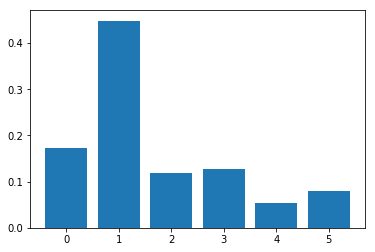

In [88]:
print(xg_model.feature_importances_)
# plot
plt.bar(range(len(xg_model.feature_importances_)), xg_model.feature_importances_)
plt.show()

In [46]:
def train_xg_boost(params):

    
    xg_model = XGBRegressor(n_estimators=int(params['n_estimators']), learning_rate=params['eta'], n_jobs=-1,
                            max_depth=int(params['max_depth']), gamma=params['gamma'], colsample_bytree=params['colsample_bytree'],
                            min_child_weight=params['min_child_weight'], reg_alpha=params['xg_reg_alpha'], subsample=params['subsample'],
                            reg_lambda=params['xg_reg_lambda']
                            )
    
    
    print("hyperparameters",params)
    # In[ ]:

    xg_model.fit(X_train.values, y_train.values)

    # In[68]:

    training_values = xg_model.predict(X_train.values)
    print(training_values)
        
    training_rmse = math.sqrt(mean_squared_error(y_train, training_values))
    
    print("training_rmse", training_rmse)
    validation_values = xg_model.predict(X_validtn.values)
    validation_rmse = math.sqrt(mean_squared_error(y_validtn, validation_values))
    print("validation_rmse", validation_rmse)

    return {'loss': validation_rmse,
        'status': STATUS_OK,
        'eval_time': time.time(),
        }





In [47]:
trials = Trials()

In [48]:
best = fmin(fn=train_xg_boost, space=space, algo=tpe.suggest,max_evals=100,trials=trials)



hyperparameters {'colsample_bytree': 0.65, 'eta': 0.225, 'gamma': 0.9, 'max_depth': 23, 'min_child_weight': 5.0, 'n_estimators': 619.2851112447337, 'nthread': 4, 'subsample': 0.8500000000000001, 'xg_reg_alpha': 2.5394229540700293, 'xg_reg_lambda': 1.096490424649413}
[3.458109  4.043931  3.716856  ... 3.6626444 4.121209  4.1531   ]
training_rmse 0.3023773217761993
validation_rmse 0.32327219499451565
hyperparameters {'colsample_bytree': 0.7000000000000001, 'eta': 0.17500000000000002, 'gamma': 1.0, 'max_depth': 21, 'min_child_weight': 2.0, 'n_estimators': 494.28378768282244, 'nthread': 4, 'subsample': 1.0, 'xg_reg_alpha': 2.327786264388546, 'xg_reg_lambda': 2.0189639326064923}
[3.2930486 4.0135746 3.709317  ... 3.6374972 4.128394  4.1588755]
training_rmse 0.3101500083051247
validation_rmse 0.32389920230991587
hyperparameters {'colsample_bytree': 0.8, 'eta': 0.225, 'gamma': 0.75, 'max_depth': 56, 'min_child_weight': 3.0, 'n_estimators': 751.4685744131002, 'nthread': 4, 'subsample': 0.60000

KeyboardInterrupt: 